# <center> Spam SMS Detection </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/DELL/Downloads/archive (8)/spam.csv",encoding='ISO-8859-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Analysis

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.shape

(5572, 5)

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
df.columns = ['Category', 'Messages', 'v3', 'v4', 'v5']

In [12]:
df.drop(['v3', 'v4', 'v5'], axis = 1, inplace = True)

In [13]:
df.head()

,Category,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.shape

(5572, 2)

In [16]:
df.describe()

,Category,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [18]:
df.isnull().sum()

Category    0
Messages    0
dtype: int64

In [19]:
df['Category Count'] = df.Category.map({ 'ham' : 0, 'spam' : 1 })

In [20]:
df.head()

,Category,Messages,Category Count
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [21]:
df.drop(['Category'], axis = 1, inplace = True)

In [22]:
df.head()

,Messages,Category Count
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## Data Preprocessing

In [23]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [24]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text) 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) 
    text = re.sub(r'\s+', ' ', text, flags=re.I)  
    text = text.lower() 
    text = text.split() 
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return ' '.join(text)

In [25]:
df['Messages'] = df['Messages'].apply(preprocess_text)

## Feature Extraction

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Messages'])
y = df['Category Count']

In [28]:
print(X)

  (0, 4656)	0.22331588422622858
  (0, 1735)	0.1897178948471492
  (0, 1072)	0.34152420933902794
  (0, 876)	0.38591407945809597
  (0, 2095)	0.34152420933902794
  (0, 4831)	0.2710064948546452
  (0, 1751)	0.22331588422622858
  (0, 878)	0.34152420933902794
  (0, 580)	0.30237659645385423
  (0, 1186)	0.31307495921542144
  (0, 2786)	0.2760402879244311
  (0, 1714)	0.16226774688701645
  (1, 2551)	0.5647537939557097
  (1, 4754)	0.4459451111953121
  (1, 2032)	0.47451057922863127
  (1, 2107)	0.4218684931830353
  (1, 2542)	0.2811632882742994
  (2, 41)	0.23671233334742495
  (2, 526)	0.16851314957353225
  (2, 3047)	0.16279867989786997
  (2, 4381)	0.12383502294019352
  (2, 3810)	0.19822868974819793
  (2, 3002)	0.16623021331440094
  (2, 3085)	0.16279867989786997
  (2, 351)	0.22253177271203253
  :	:
  (5567, 3047)	0.2599516331025906
  (5568, 1462)	0.6134635634925883
  (5568, 1621)	0.5293895218987117
  (5568, 4987)	0.3857537525829914
  (5568, 1854)	0.345422210787593
  (5568, 1714)	0.27438427256965814
  (5

In [29]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category Count, Length: 5572, dtype: int64


## Splitting the dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [36]:
X_train.shape[0]

4457

In [37]:
y_train.shape[0]

4457

In [38]:
X_test.shape[0]

1115

In [39]:
y_test.shape[0]

1115

## Model Training

### Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

In [43]:
new_prediction = ["Oh k...i'm watching here:)"]
new_X = tfidf.transform(new_prediction)
predicted_category = naive.predict(new_X)
print(predicted_category)

[0]


In [44]:
y_pred_naive = naive.predict(X_test)
Results = pd.DataFrame({'Actual_Result' : y_test,'Predicted_Result' : y_pred_naive})

In [47]:
Results.head(20)

,Actual_Result,Predicted_Result
4732,0,0
4952,0,0
3724,0,0
5261,0,0
1274,0,0
3390,0,0
888,0,0
5450,0,0
2478,0,0
4764,0,0


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
cm_naive = confusion_matrix(y_test, y_pred_naive)
print('Confusion Matrix of Naive Bayes Model is\n', cm_naive)

Confusion Matrix of Naive Bayes Model is
 [[967   0]
 [ 26 122]]


In [50]:
ac_naive = accuracy_score(y_test, y_pred_naive)
print('The Accuracy Score Performed by the Model', ac_naive)

The Accuracy Score Performed by the Model 0.9766816143497757


In [51]:
NB_clf_report = classification_report(y_test, y_pred_naive)
print(NB_clf_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       967
           1       1.00      0.82      0.90       148

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### SVM

In [52]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [53]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_svm, y_train_svm)

SVC()

In [54]:
svm_prediction = ["Oh k...i'm watching here:)"]
svm_X = tfidf.transform(svm_prediction)
predicted_category_svm = naive.predict(svm_X)

In [55]:
print(predicted_category_svm)

[0]


In [56]:
y_pred_svm = svm.predict(X_test_svm)
Result_svm = pd.DataFrame({'Actual_SVM_Result' : y_test_svm,'Predicted_SVM_Result' : y_pred_svm})

In [57]:
Result_svm.head(20)

,Actual_SVM_Result,Predicted_SVM_Result
4732,0,0
4952,0,0
3724,0,0
5261,0,0
1274,0,0
3390,0,0
888,0,0
5450,0,0
2478,0,0
4764,0,0


In [58]:
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
print('Confusion Matrix of Support Vector Machine Model is\n', cm_svm)

Confusion Matrix of Support Vector Machine Model is
 [[965   2]
 [ 18 130]]


In [59]:
ac_svm = accuracy_score(y_test_svm, y_pred_svm)
print('The Accuracy Score Performed by the Model', ac_svm)

The Accuracy Score Performed by the Model 0.9820627802690582


In [60]:
svm_clf_report = classification_report(y_test_svm, y_pred_svm)
print(svm_clf_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       967
           1       0.98      0.88      0.93       148

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



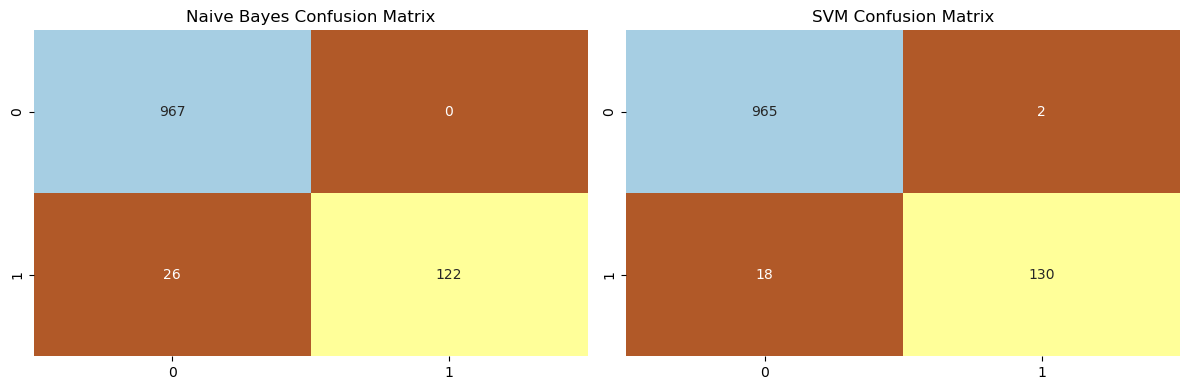

In [65]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
sns.heatmap(cm_naive, annot = True, fmt = 'd', cmap = 'Paired_r', cbar = False, ax = axes[0])
axes[0].set_title('Naive Bayes Confusion Matrix')
sns.heatmap(cm_svm, annot = True, fmt = 'd', cmap = 'Paired_r', cbar = False, ax = axes[1])
axes[1].set_title('SVM Confusion Matrix')
plt.tight_layout()
plt.show()

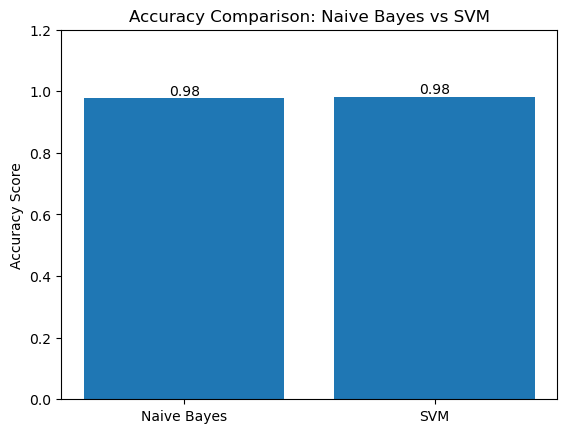

In [66]:
models = ['Naive Bayes', 'SVM']
accuracies = [ac_naive, ac_svm]
plt.bar(models, accuracies)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison: Naive Bayes vs SVM')
plt.ylim(0, 1.2)
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
plt.show()